In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




In [4]:
import pandas as pd

train_data_path = '/content/fraudTest.csv'
test_data_path = '/content/fraudTest.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35008 entries, 0 to 35007
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35008 non-null  int64  
 1   trans_date_trans_time  35008 non-null  object 
 2   cc_num                 35008 non-null  int64  
 3   merchant               35008 non-null  object 
 4   category               35008 non-null  object 
 5   amt                    35008 non-null  float64
 6   first                  35008 non-null  object 
 7   last                   35008 non-null  object 
 8   gender                 35008 non-null  object 
 9   street                 35008 non-null  object 
 10  city                   35008 non-null  object 
 11  state                  35008 non-null  object 
 12  zip                    35008 non-null  int64  
 13  lat                    35008 non-null  float64
 14  long                   35008 non-null  float64
 15  ci

In [6]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,35008.000000,3.500800e+04,35008.000000,35008.000000,35008.000000,35008.000000,3.500800e+04,3.500700e+04,35007.000000,35007.000000,35007.000000
mean,17503.500000,4.149182e+17,69.131486,48557.951754,38.549832,-90.077189,8.945956e+04,1.372307e+09,38.546758,-90.076530,0.004085
std,10106.083448,1.305317e+18,133.139981,26797.354254,5.053311,13.579377,3.030985e+05,3.020174e+05,5.089403,13.590071,0.063783
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.057104,-166.584303,0.000000
25%,8751.750000,1.800429e+14,9.660000,25832.000000,34.668900,-96.727000,7.430000e+02,1.372009e+09,34.756095,-96.774987,0.000000
50%,17503.500000,3.518759e+15,46.750000,48088.000000,39.383200,-87.456900,2.456000e+03,1.372344e+09,39.387560,-87.351373,0.000000
75%,26255.250000,4.634956e+15,82.922500,72011.000000,42.015800,-80.128400,2.032800e+04,1.372553e+09,41.981051,-80.188967,0.000000
max,35007.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372858e+09,66.669356,-66.955602,1.000000


In [7]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [8]:
print(train_df['is_fraud'].value_counts())

0.0    34864
1.0      143
Name: is_fraud, dtype: int64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

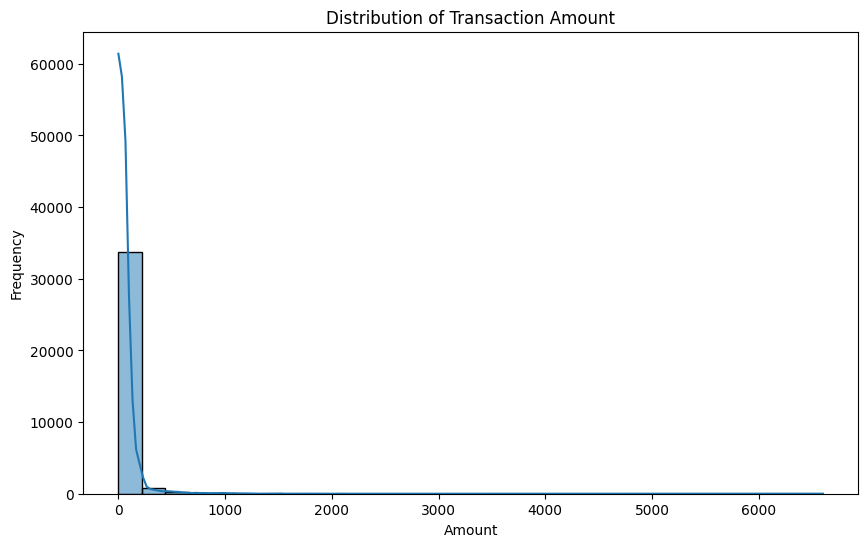

In [10]:
# Histogram of 'amt'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


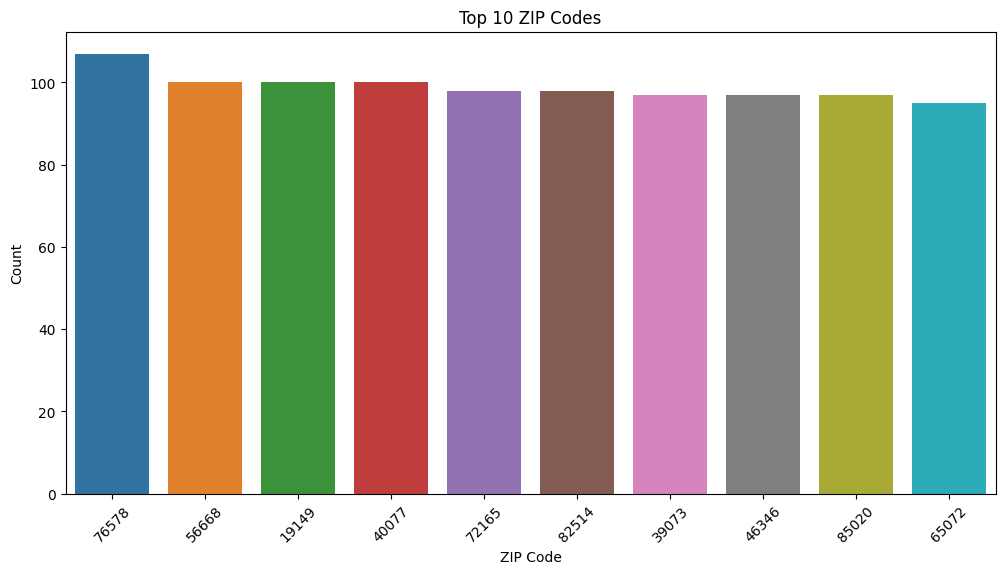

In [11]:
# Count plot of 'zip' with the top 10 ZIP codes
top_zip_codes = train_df['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_df[train_df['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


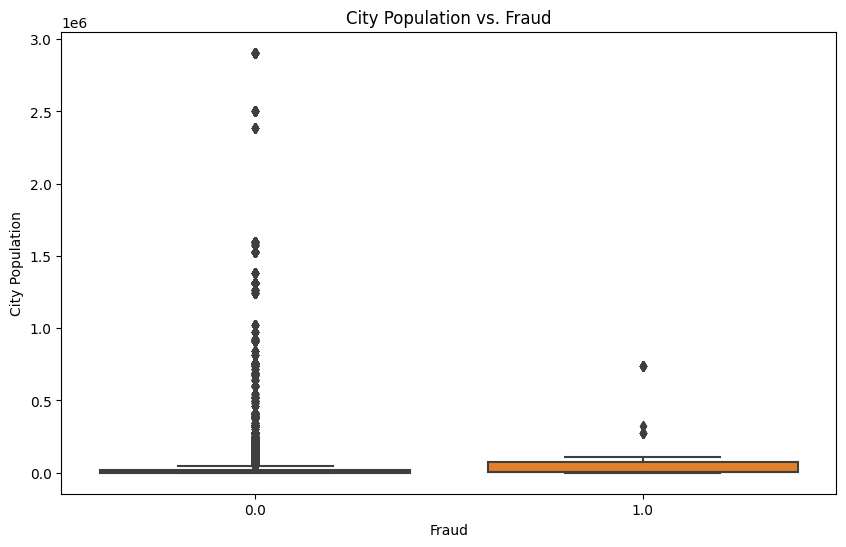

In [12]:
# Box plot of 'city_pop' with 'is_fraud' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=train_df)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('City Population')
plt.show()


<ipython-input-13-9c1822a0d4c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


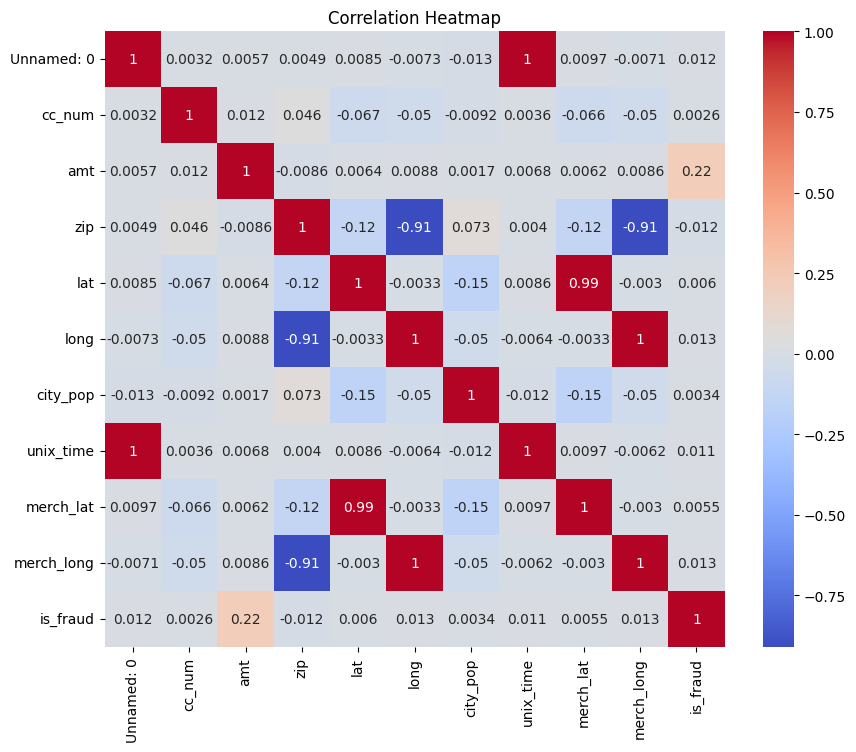

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Fill missing values
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [15]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_df[features]
y = train_df['is_fraud']

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Build and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Evaluate the model
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      -999.0       0.00      0.00      0.00         1
         0.0       1.00      1.00      1.00      6974
         1.0       1.00      0.56      0.71        27

    accuracy                           1.00      7002
   macro avg       0.67      0.52      0.57      7002
weighted avg       1.00      1.00      1.00      7002



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
